In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100, 'display.max_rows', 150)
import numpy as np
import matplotlib.pyplot as plt
import config

#Load google.cloud.bigquery
%load_ext google.cloud.bigquery

#Select path to credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=config.GOOGLE_APPLICATION_CREDENTIALS

In [2]:
%%bigquery --use_rest_api ZRI_MF
SELECT *
FROM `high-empire-220313.ZRI.Multi_Family`

In [3]:
ZRI_MF = ZRI_MF.set_index('RegionID', drop = False)

# keep only ZRI Month/Year Columns
months_only = ZRI_MF.iloc[:,7:-4]

Text(0, 0.5, 'Percent of ZRI Scores Missing')

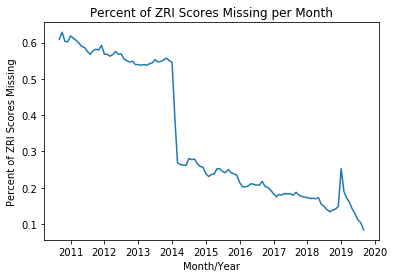

In [4]:
# missing values by month
## generally speaking, early months (closer to 2010) have more missing values
missing_per_month = pd.DataFrame(months_only.isnull().sum()).sort_values(0)

#percent missing by month
percent_missing_month = missing_per_month / len(months_only)

#Change index to datetime
percent_missing_month.index = pd.to_datetime(percent_missing_month.index, format = "_%Y_%m")

#sort_index (earliest first)
percent_missing_month = percent_missing_month.sort_index()

# Create Plot - Percent of ZRI Scores Missing per Month
plt.plot(percent_missing_month)
plt.title('Percent of ZRI Scores Missing per Month')
plt.xlabel('Month/Year')
plt.ylabel('Percent of ZRI Scores Missing')

In [5]:
#GOAL: FIND ALL ROWS WITH ANY MISSING ZRI VALUES

#convert entire dataframe into Boolean values
is_NaN = months_only.isnull()

#Create Boolean for rows with missing values
row_has_NaN = is_NaN.any(axis=1)

#retrun dataframe with rows that are missing at least one ZRI score
rows_with_NaN = months_only[row_has_NaN]

# 1632 out of 1861 rows have at least one missing value (87.69%)
rows_with_NaN

,_2010_09,_2010_10,_2010_11,_2010_12,_2011_01,_2011_02,_2011_03,_2011_04,_2011_05,_2011_06,_2011_07,_2011_08,_2011_09,_2011_10,_2011_11,_2011_12,_2012_01,_2012_02,_2012_03,_2012_04,_2012_05,_2012_06,_2012_07,_2012_08,_2012_09,_2012_10,_2012_11,_2012_12,_2013_01,_2013_02,_2013_03,_2013_04,_2013_05,_2013_06,_2013_07,_2013_08,_2013_09,_2013_10,_2013_11,_2013_12,_2014_01,_2014_02,_2014_03,_2014_04,_2014_05,_2014_06,_2014_07,_2014_08,_2014_09,_2014_10,...,_2015_08,_2015_09,_2015_10,_2015_11,_2015_12,_2016_01,_2016_02,_2016_03,_2016_04,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,_2017_02,_2017_03,_2017_04,_2017_05,_2017_06,_2017_07,_2017_08,_2017_09,_2017_10,_2017_11,_2017_12,_2018_01,_2018_02,_2018_03,_2018_04,_2018_05,_2018_06,_2018_07,_2018_08,_2018_09,_2018_10,_2018_11,_2018_12,_2019_01,_2019_02,_2019_03,_2019_04,_2019_05,_2019_06,_2019_07,_2019_08,_2019_09
RegionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
91982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1081.0,1093.0,1113.0,1118.0,1116.0,1118.0,1117.0,1112.0,...,1276.0,1304.0,1320.0,1297.0,1292.0,1295.0,1289.0,1283.0,1287.0,1283.0,1276.0,1249.0,1246.0,1250.0,1235.0,1220.0,1208.0,1203.0,1193.0,1186.0,1173.0,1170.0,1170.0,1180.0,1188.0,1182.0,1189.0,1191.0,1201.0,1214.0,1218.0,1214.0,1222.0,1233.0,1237.0,1225.0,1223.0,1228.0,1244.0,1251.0,1282.0,1255.0,1240.0,1234.0,1226.0,1250.0,1264.0,1251.0,1246.0,1252.0
61616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3083.0,3108.0,3111.0,3140.0,3143.0,3167.0,3190.0,3269.0,3344.0,...,3626.0,3659.0,3584.0,3579.0,3609.0,3587.0,3564.0,3548.0,3567.0,3589.0,3644.0,3652.0,3618.0,3588.0,3594.0,3586.0,3543.0,3513.0,3518.0,3570.0,3633.0,3624.0,3661.0,3652.0,3637.0,3615.0,3586.0,3592.0,3617.0,3560.0,3488.0,3474.0,3487.0,3427.0,3402.0,3399.0,3407.0,3461.0,3504.0,3494.0,3472.0,3441.0,3425.0,3408.0,3406.0,3408.0,3420.0,3432.0,3440.0,3481.0
91733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1353.0,1343.0,1372.0,1378.0,1373.0,1371.0,1361.0,1347.0,1332.0,1311.0,1290.0,1266.0,1246.0,1237.0,1238.0,1238.0,1234.0,1244.0,1247.0,1244.0,1253.0,1266.0,1290.0,1305.0,1320.0,1331.0,1331.0,1335.0,1349.0,1356.0,1355.0,1352.0,1348.0,1342.0,1335.0,1332.0,1326.0,1320.0,1311.0,1305.0,1301.0,1298.0,1298.0,1298.0,1307.0
92593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999.0,1006.0,1019.0,1036.0,1042.0,1064.0,1086.0,1103.0,...,1177.0,1191.0,1201.0,1222.0,1217.0,1204.0,1195.0,1188.0,1208.0,1219.0,1235.0,1240.0,1244.0,1258.0,1263.0,1264.0,1257.0,1238.0,1232.0,1245.0,1236.0,1245.0,1267.0,1278.0,1287.0,1286.0,1265.0,1259.0,1261.0,1272.0,1285.0,1297.0,1308.0,1320.0,1328.0,1304.0,1295.0,1286.0,1291.0,1292.0,1288.0,1287.0,1290.0,1283.0,1280.0,1283.0,1288.0,1301.0,1322.0,1341.0
97564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3116.0,3138.0,3152.0,3145.0,3147.0,3155.0,3164.0,3160.0,...,3559.0,3547.0,3528.0,3504.0,3489.0,3511.0,3531.0,3559.0,3567.0,3584.0,3579.0,3559.0,3533.0,3537.0,3527.0,3498.0,3468.0,3434.0,3405.0,3389.0,3377.0,3371.0,3340.0,3332.0,3339.0,3345.0,3321.0,3290.0,3269.0,3282.0,3295.0,3303.0,3325.0,3336.0,3363.0,3367.0,3369.0,3366.0,3363.0,3363.0,3382.0,3383.0,3393.0,3391.0,3397.0,3402.0,3405.0,3411.0,3427.0,3459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Text(0, 0.5, 'Number of Zipcodes')

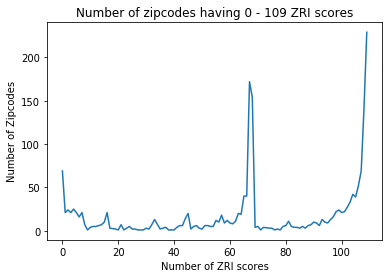

In [6]:
# Number of recorded ZRI's for each zipcode
ZRI_num = months_only.count(axis = 1)
#convert to Dataframe
pd_num_missing_ZRI=pd.DataFrame(ZRI_num)

# change column name from 0 to ZRIs
pd_num_missing_ZRI['ZRIs'] = pd_num_missing_ZRI[0]
pd_num_missing_ZRI = pd_num_missing_ZRI.drop(columns = 0)

#create dataframe with number of zipcodes having 0 - 109 ZRI scores
count_missing_num = pd.DataFrame(pd_num_missing_ZRI.groupby('ZRIs')['ZRIs'].count())

# Create 'Number of zipcodes having 0 - 109 ZRI scores' plot
plt.plot(count_missing_num)
plt.title('Number of zipcodes having 0 - 109 ZRI scores')
plt.xlabel('Number of ZRI scores')
plt.ylabel('Number of Zipcodes')
#Note: Having 67 and 68 scores breaks from the pattern

In [7]:
# zipcodes that have exacly 67 ZRI scores
zri_67 = pd_num_missing_ZRI[pd_num_missing_ZRI ==67].dropna()

# zipcodes that have exacly 68 ZRI scores
zri_68 = pd_num_missing_ZRI[pd_num_missing_ZRI ==68].dropna()

# combine the 67 and 68 dataframes
zri_67_68= pd.concat([zri_67,zri_68])

#separately merge zri_67, zri_68, and zri_67_68 with original ZRI_MF dataframe
df_zri_67 = pd.merge(zri_67, ZRI_MF, left_index=True, right_index=True)
df_zri_68 = pd.merge(zri_68, ZRI_MF, left_index=True, right_index=True)
df_zri_67_68 = pd.merge(zri_67_68, ZRI_MF, left_index=True, right_index=True)

In [41]:
# eliminate all but months columns for zipcodes with 67 missing
df_zri_67_months = df_zri_67.iloc[:,8:]

# missing values by month (for zipcodes with 67 missing)
df_zri_67_missing = pd.DataFrame(df_zri_67_months.isnull().sum()).sort_values(0)

#percent missing by month
percent_missing_month_67 = df_zri_67_missing / len(df_zri_67_months)

#sort_index (earliest first)
percent_missing_month_67 = percent_missing_month_67.sort_index()

#Change index to datetime
percent_missing_month_67.index = pd.to_datetime(percent_missing_month_67.index, format = "_%Y_%m")

Text(0, 0.5, 'Percent of ZRI Scores Missing')

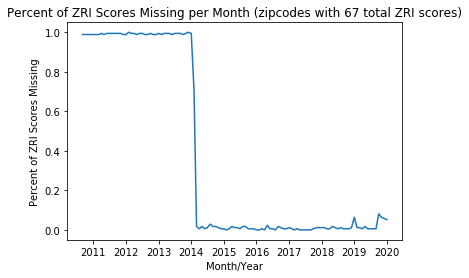

In [54]:
# Create Plot - Percent of ZRI Scores Missing per Month (zipcodes with 67 total ZRI scores)
plt.plot(percent_missing_month_67)
plt.title('Percent of ZRI Scores Missing per Month (zipcodes with 67 total ZRI scores)')
plt.xlabel('Month/Year')
plt.ylabel('Percent of ZRI Scores Missing')

Text(0, 0.5, 'Percent of ZRI Scores Missing')

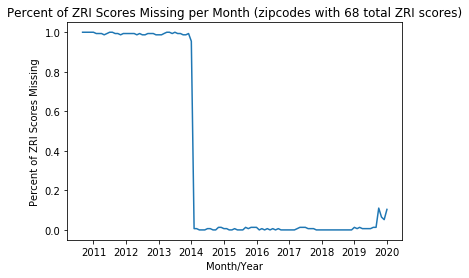

In [55]:
# eliminate all but months columns for zipcodes with 68 missing
df_zri_68_months = df_zri_68.iloc[:,8:]

# missing values by month (for zipcodes with 68 missing)
df_zri_68_missing = pd.DataFrame(df_zri_68_months.isnull().sum()).sort_values(0)

#percent missing by month
percent_missing_month_68 = df_zri_68_missing / len(df_zri_68_months)

#sort_index (earliest first)
percent_missing_month_68 = percent_missing_month_68.sort_index()

#Change index to datetime
percent_missing_month_68.index = pd.to_datetime(percent_missing_month_68.index, format = "_%Y_%m")

# Create Plot - Percent of ZRI Scores Missing per Month (zipcodes with 68 total ZRI scores)
plt.plot(percent_missing_month_68)
plt.title('Percent of ZRI Scores Missing per Month (zipcodes with 68 total ZRI scores)')
plt.xlabel('Month/Year')
plt.ylabel('Percent of ZRI Scores Missing')

Text(0, 0.5, 'Percent of ZRI Scores Missing')

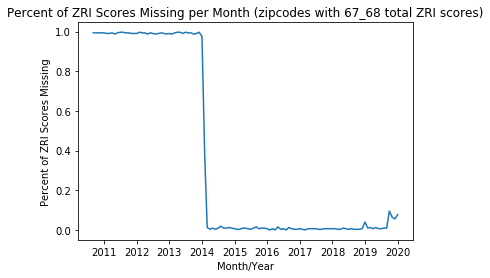

In [56]:
# eliminate all but months columns for zipcodes with 67_68 missing
df_zri_67_68_months = df_zri_67_68.iloc[:,8:]

# missing values by month (for zipcodes with 67_68 missing)
df_zri_67_68_missing = pd.DataFrame(df_zri_67_68_months.isnull().sum()).sort_values(0)

#percent missing by month
percent_missing_month_67_68 = df_zri_67_68_missing / len(df_zri_67_68_months)

#sort_index (earliest first)
percent_missing_month_67_68 = percent_missing_month_67_68.sort_index()

#Change index to datetime
percent_missing_month_67_68.index = pd.to_datetime(percent_missing_month_67_68.index, format = "_%Y_%m")

# Create Plot - Percent of ZRI Scores Missing per Month (zipcodes with 67_68 total ZRI scores)
plt.plot(percent_missing_month_67_68)
plt.title('Percent of ZRI Scores Missing per Month (zipcodes with 67_68 total ZRI scores)')
plt.xlabel('Month/Year')
plt.ylabel('Percent of ZRI Scores Missing')

# Conclusion, significantly more zipcodes were given ZRI scores starting in 2014

# Because of this, we may want to focus on the years 2014-2019 instead of 2010-2019